---

# CSCI 3202, Spring 2022
# Homework 3
# Due: Friday March 11, 2022 at 6:00 PM

<br> 

### Your name: Kyle Moe

<br> 

---

Some useful packages and libraries:



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats
import copy as cp
from time import time

---

## Problem 1: Game Theory - Playing "intelligent" Tic-Tac-Toe

<img src="https://www.cookieshq.co.uk/images/2016/06/01/tic-tac-toe.png" width="150"/>



### (1a)   Defining the Tic-Tac-Toe class structure

Fill in this class structure for Tic-Tac-Toe using what we did during class as a guide.
* `moves` is a list of tuples to represent which moves are available. Recall that we are using matrix notation for this, where the upper-left corner of the board, for example, is represented at (1,1).
* `result(self, move, state)` returns a ***hypothetical*** resulting `State` object if `move` is made when the game is in the current `state`
* `compute_utility(self, move, state)` calculates the utility of `state` that would result if `move` is made when the game is in the current `state`. This is where you want to check to see if anyone has gotten `nwin` in a row
* `game_over(self, state)` - this wasn't a method, but it should be - it's a piece of code we need to execute repeatedly and giving it a name makes clear what task the piece of code performs. Returns `True` if the game in the given `state` has reached a terminal state, and `False` otherwise.
* `utility(self, state, player)` also wasn't a method earlier, but also should be.  Returns the utility of the current state if the player is X and $-1 \cdot$ utility if the player is O.
* `display(self)` is a method to display the current game `state`, You get it for free! because this would be super frustrating without it.
* `play_game(self, player1, player2)` returns an integer that is the utility of the outcome of the game (+1 if X wins, 0 if draw, -1 if O wins). `player1` and `player2` are functional arguments that we will deal with in parts **1b** and **1d**.

Some notes:
* Assume X always goes first.
* Do **not** hard-code for 3x3 boards.
* You may add attributes and methods to these classes as needed for this problem.

In [3]:
class State:
    def __init__(self, moves):
        self.to_move = 'X'
        self.utility = 0
        self.board = {}
        self.moves = cp.copy(moves)

        
class TicTacToe:
    
    def __init__(self, nrow=3, ncol=3, nwin=3, nexp=0):
        self.nrow = nrow
        self.ncol = ncol
        self.nwin = nwin
#        moves = # insert your general list of nrow x ncol moves here
        moves = [(row, col) for row in range(1, nrow + 1) for col in range(1, ncol + 1)]
        self.state = State(moves)
        self.nexp = nexp

    def result(self, move, state):
        '''
        What is the hypothetical result of move `move` in state `state` ?
        move  = (row, col) tuple where player will put their mark (X or O)
        state = a `State` object, to represent whose turn it is and form
                the basis for generating a **hypothetical** updated state
                that will result from making the given `move`
        '''

        # your code goes here
        if move not in state.moves:
            return state
        
        new_state = cp.deepcopy(state)
        new_state.utility = self.compute_utility(move, state)
        new_state.board[move] = state.to_move
        new_state.moves.remove(move)
        
        if state.to_move == 'X':
            new_state.to_move = 'O'
        else:
            new_state.to_move = 'X'
        
        return new_state
        
    def compute_utility(self, move, state):
        '''
        What is the utility of making move `move` in state `state`?
        If 'X' wins with this move, return 1;
        if 'O' wins return -1;
        else return 0.
        '''        

        # your code goes here
        
        # save current player
        player = state.to_move
        
        # get prospective state and check that move is valid
        board = cp.deepcopy(state.board)
        if move in board:
            return 0
        else:
            board[move] = player
        
        #row check
        for i in range(1,self.nrow+1):
            # For ncol we must iterate through start points
            for s in range(1, self.ncol-self.nwin+2):
                # get player at start point in consideration (must match player to provide utility)
                if (i,s) not in board:
                    continue
                first = board[(i,s)]
                if first != player:
                    continue
                    
                for j in range(s, s+self.nwin):
                    if (i,j) not in board:
                        break
                    if not board[(i,j)] == first:
                        break
                    if j == s+self.nwin-1 and board[(i,j)] == first:
                        return self.getScore(player)
                    
        #col check
        for i in range(1, self.ncol+1):
            # For nrow we must iterate through start points
            for s in range(1, self.nrow-self.nwin+2):
                # get player at start point in consideration (must match player to provide utility)
                if (s,i) not in board:
                    continue
                first = board[(s,i)]
                if first != player:
                    continue
                
                for j in range(s, s+self.nwin):
                    if (j,i) not in board:
                        break
                    if not board[(j,i)] == first:
                        break
                    if j == s+self.nwin-1 and board[(j,i)] == first:
                        return self.getScore(player)
        
        # top left - bottom right diag check
        # starting row
        for rs in range(1,self.nrow-self.nwin+2):
            # starting column
            for cs in range(1, self.ncol-self.nwin+2):
                if (rs,cs) not in board:
                    continue
                first = board[(rs,cs)]
                if first != player:
                    continue
                
                #iterate diagonally
                for i in range(0, self.nwin):
                    if (rs+i,cs+i) not in board:
                        break
                    if not board[(rs+i,cs+i)] == first:
                        break
                    if i == self.nwin-1 and board[(rs+i,cs+i)] == first:
                        return self.getScore(player)
                    
        # bottom left - top right diag check
        # starting row
        for rs in range(self.nrow-self.nwin, self.nrow+2):
            for cs in range(1, self.ncol-self.nwin+2):
                if (rs,cs) not in board:
                    continue
                first = board[(rs,cs)]
                if first != player:
                    continue
                
                #iterate diagonally
                for i in range(0, self.nwin):
                    if (rs-i,cs+i) not in board:
                        break
                    if not board[(rs-i,cs+i)] == first:
                        break
                    if i == self.nwin-1 and board[(rs-i,cs+i)] == first:
                        return self.getScore(player)
        return 0       
        
                            
    def getScore(self, player):
        if player == 'X':
            return 1
        else:
            return -1

    def game_over(self, state):
        '''game is over if someone has won (utility!=0) or there
        are no more moves left'''

        # your code goes here
        
        if len(state.moves) == 0:
            return True
        
        if state.utility != 0:
            return True
        
        return False
        
    
    def utility(self, state, player):
        '''Return the value to player; 1 for win, -1 for loss, 0 otherwise.'''

        # your code goes here
        return state.utility if player == 'X' else -state.utility
        
        
    def display(self):
        for row in range(1, self.nrow+1):
            for col in range(1, self.ncol+1):
                print(self.state.board.get((row, col), '.'), end=' ')
            print()
        
    def play_game(self, player1, player2):
        '''Play a game of tic-tac-toe!'''

        # your code goes here
        turn_limit = self.nrow * self.ncol
        turn =0
        while turn <= turn_limit:
            for player in [player1, player2]:
                turn += 1
                move = player(self, self.state.to_move)
                self.state = self.result(move, self.state)
                if self.game_over(self.state):
                    self.display()
                    return self.state.utility 
  

In [4]:
def random_player(game, player):
    '''A player that chooses a legal move at random out of all
    available legal moves in Tic-Tac-Toe state argument'''

    
    # your code goes here...
    possible_actions = game.state.moves
    if len(possible_actions) == 0:
        return
    return possible_actions[np.random.randint(low=0, high=len(possible_actions))]

We know from experience and/or because I'm telling you right now that if two `random_player`s play many games of Tic-Tac-Toe against one another, whoever goes first will win about 58% of the time.  Verify that this is the case by playing at least 1,000 games between two random players. Report the proportion of the games that the first player has won.

**"Unit tests":** If you are wondering how close is close enough to 58%, I simulated 100 tournaments of 1,000 games each. The min-max range of win percentage by the first player was 54-63%.

In [5]:
# 1000 games between two random players
# Your code here
xwins = 0
owins = 0
ties = 0


for i in range(1000):
    game = TicTacToe(nrow=3,ncol=3,nwin=3)
    result = game.play_game(random_player, random_player)
    print(result)
    if result == 0:
        ties += 1
    elif result == 1:
        xwins += 1
    else:
        owins += 1
        
print("X won " + str(xwins) + " games out of 1000")
print("O won " + str(owins) + " games out of 1000")
print("Tied " + str(ties) + " games out of 1000")

X X X 
O X O 
O . . 
1
X . O 
X O X 
O O X 
-1
O X . 
. X X 
O X O 
1
X X X 
O X O 
O O X 
1
O O O 
. . X 
. X X 
-1
O O O 
O X X 
X . X 
-1
X X O 
O O X 
X O X 
0
O . X 
. . X 
O . X 
1
X X . 
O X . 
O X O 
1
X X O 
O X X 
X O O 
0
X X O 
. O . 
O . X 
-1
. . . 
O . O 
X X X 
1
O O X 
O X X 
. . X 
1
O X X 
O O X 
X O X 
1
O X O 
X X X 
X O O 
1
O O X 
. X X 
X O . 
1
O X X 
O . . 
O X . 
-1
O O X 
O X X 
X X O 
1
. X X 
X X O 
O O O 
-1
X O X 
X . O 
X . O 
1
O . . 
O X . 
O X X 
-1
X . . 
O O O 
X X . 
-1
X X X 
O O X 
X O O 
1
O X X 
X O X 
O O X 
1
X . O 
X X O 
O X O 
-1
X O X 
O O X 
O X X 
1
X X O 
O O . 
O X X 
-1
X X O 
O X O 
O X X 
1
. O X 
X X O 
X . O 
1
. . . 
O O . 
X X X 
1
X . O 
X X X 
O O . 
1
O O X 
X X X 
O X O 
1
X X O 
O O X 
X O X 
0
O X X 
. O X 
. O X 
1
X X O 
O X X 
O O X 
1
X X O 
O O X 
X X O 
0
O O O 
. . X 
. X X 
-1
O . X 
X O X 
O X O 
-1
X O X 
O X X 
X O O 
1
. X X 
O X . 
O X O 
1
X O X 
O O X 
O X X 
1
O X X 
X X O 
X O O 
1
X X O 
X O O 
X O X 
1

X O X 
X X O 
O X O 
0
X O . 
X . O 
X X O 
1
O X X 
X X O 
X O O 
1
O . X 
X O X 
O . X 
1
X O O 
X O O 
X X X 
1
O X O 
X X O 
O X X 
1
O X X 
O X X 
O . O 
-1
X O O 
O X X 
. . X 
1
X . . 
X . X 
O O O 
-1
. O X 
X X O 
X . O 
1
X X O 
X . O 
X O . 
1
X X O 
. O . 
O . X 
-1
X O O 
X X X 
O X O 
1
X X O 
. X O 
O . X 
1
X O X 
O X X 
O X O 
0
X O O 
X X X 
O X O 
1
O O . 
X X X 
. X O 
1
X X O 
X O O 
. X O 
-1
X X O 
O O X 
X O X 
0
O X O 
X . O 
X X O 
-1
O O X 
O X . 
O X X 
-1
O X X 
O . . 
O . X 
-1
X O O 
O X X 
X O X 
1
. X O 
. X . 
O X . 
1
O . X 
. O X 
. X O 
-1
X O X 
X X O 
O X O 
0
O X O 
X X O 
O X X 
1
O X X 
X O O 
X O X 
0
X X X 
X O O 
O O X 
1
X X O 
O X X 
X O O 
0
X O O 
X X O 
. . X 
1
O X X 
X X O 
O O X 
0
O X X 
X O O 
X O X 
0
O . X 
O X O 
O X X 
-1
X X O 
X O O 
X O X 
1
O X O 
X X O 
. X . 
1
O X X 
O X X 
O . O 
-1
X O O 
X X O 
O X X 
1
X X O 
. X O 
. . O 
-1
X X . 
X O O 
X O . 
1
X X O 
. O O 
X X O 
-1
X X O 
O X O 
X O X 
1
O X X 
O X O 
X O X 
1

O O X 
. . O 
X X X 
1
O O X 
X . X 
. O X 
1
X X X 
O . . 
O . . 
1
X O X 
X O X 
O X O 
0
X O X 
X O O 
X X O 
1
O . . 
O X O 
X X X 
1
X X O 
O X X 
O O X 
1
X . O 
X O X 
O . . 
-1
O . . 
O . . 
X X X 
1
O X . 
O O X 
O X X 
-1
O X X 
X . X 
O O O 
-1
O O X 
X O X 
O X X 
1
O O . 
. . . 
X X X 
1
X X . 
O X . 
O O X 
1
O X X 
O O O 
X . X 
-1
X O O 
. X . 
. . X 
1
X X X 
O O X 
X O O 
1
X X O 
O O X 
X O X 
0
O O X 
O X X 
X X O 
1
X . X 
X X O 
O O O 
-1
O X X 
O X X 
X O O 
1
O O O 
. X X 
X O X 
-1
. . X 
O O O 
. X X 
-1
. X X 
O X . 
X O O 
1
X X O 
X O O 
O . X 
-1
X X O 
O O X 
O . X 
-1
. X . 
O O O 
X X . 
-1
X . O 
. X O 
. . X 
1
X X O 
. X X 
O O O 
-1
X . X 
O O O 
X X O 
-1
O O X 
X X X 
O X O 
1
O X O 
X . O 
X X O 
-1
X . O 
X X O 
O X O 
-1
O . X 
O . . 
O X X 
-1
X O X 
X O O 
X X O 
1
O . X 
. . X 
O . X 
1
X . O 
O X O 
X X O 
-1
X X O 
O X O 
X O X 
1
X O O 
. X X 
. O X 
1
O X . 
O X X 
O O X 
-1
O X X 
X O O 
X O X 
0
O O O 
X . X 
O X X 
-1
X X X 
. O O 
O 

### (1c) What about playing randomly on different-sized boards?

What does the long-term win percentage appear to be for the first player in a 4x4 Tic-Tac-Toe tournament, where 4 marks must be connected for a win?  Support your answer using a simulation and printed output, similar to **1b**.

**Also:** The win percentage should have changed substantially. Did the decrease in wins turn into more losses for the first player or more draws? Write a few sentences explaining the behavior you observed.  *Hint: think about how the size of the state space has changed.*

In [6]:
# 1000 games between two random players
# Your code here

xwins = 0
owins = 0
ties = 0


for i in range(1000):
    game = TicTacToe(nrow=4,ncol=4,nwin=4)
    result = game.play_game(random_player, random_player)
    print(result)
    if result == 0:
        ties += 1
    elif result == 1:
        xwins += 1
    else:
        owins += 1
        
print("X won " + str(xwins) + " games out of 1000")
print("O won " + str(owins) + " games out of 1000")
print("Tied " + str(ties) + " games out of 1000")

X O O O 
O X X O 
X O X O 
X X X O 
-1
X O O O 
O X X X 
O O O X 
X O X X 
0
X O X O 
X X X X 
. O O X 
O O O X 
1
O O X O 
O X X O 
X O X X 
X X O O 
0
O . X O 
O O O O 
O X X X 
. X X X 
-1
X O O O 
O O X X 
X X O O 
X X O X 
0
. . . X 
O . O X 
. O . X 
. O X X 
1
X X X O 
O X . O 
O O X O 
O X X X 
1
X O O X 
X O X O 
O X X O 
O X X O 
0
X O X X 
X O X X 
O O X O 
X O O O 
-1
X O O O 
O X O X 
X X O O 
X O X X 
0
O X X O 
X X X O 
X O O O 
O X O X 
0
X X O X 
O O O O 
X X O X 
O O X X 
-1
X X O X 
O O X O 
X O X O 
X X O O 
0
X O X X 
O O O X 
X X O O 
O X X O 
0
. X . O 
O . . . 
O . O . 
X X X X 
1
X X O X 
X X X O 
O O X O 
O O . X 
1
X X O X 
O O O X 
X O X X 
O O X O 
0
O . . . 
O . X X 
O . O X 
O . X X 
-1
O X O . 
X X O . 
X X . O 
O X X O 
1
X O O O 
O X X O 
X O X X 
X O X O 
0
O O O X 
O O X O 
X O X X 
X X X O 
0
X O X O 
X X O O 
O O O X 
X O X X 
0
O O O O 
. X X . 
O O X X 
O X X X 
-1
O X X O 
O X O O 
X X X O 
. X O X 
1
X X O X 
O X O O 
O X . O 
O X X X 
1
X X X 

1
X . O X 
O X . X 
O O X . 
X O O X 
1
X O O X 
X X X O 
O X O O 
O X O X 
0
X X X X 
. . O . 
. O . O 
X O O X 
1
X O O O 
O O O X 
X . X O 
X X X X 
1
X O O X 
O O O X 
X X O O 
X O X X 
0
O X X X 
O O X O 
X O X O 
X O O X 
0
O O O X 
X O X O 
O O X X 
X X X O 
0
O X X X 
X O X O 
O X O X 
O X O O 
-1
X X O O 
X X O O 
O . O O 
X X X X 
1
X O X X 
O O X O 
. X X X 
X O O O 
1
X O X O 
X O O X 
O X O O 
X X X O 
0
O O X O 
X X O X 
O O X X 
O X X O 
-1
X X O O 
. X O . 
X X . . 
O X O . 
1
X O X O 
O O X X 
X X O O 
O X X O 
0
O X X X 
O X O X 
O X X O 
X O O O 
0
X . X X 
. X O O 
O O O O 
X X O X 
-1
O O X X 
X O O X 
O X O O 
O X X X 
0
O X X . 
O O X O 
O O X X 
X O X X 
1
X O O O 
O X X O 
X O O X 
X O X X 
0
X O X X 
O . X . 
. O X O 
O O X X 
1
O O X O 
X O X O 
X O X X 
X O O X 
-1
O O X X 
X X O O 
X O X X 
O X O O 
0
O X O O 
X X X O 
O O X O 
O X X X 
0
X O O . 
X . . O 
X . X O 
X . . . 
1
X O . . 
O X O X 
O O X X 
O X . X 
1
O X O X 
X O X O 
X O O X 
X O X O 
-1
O O X

X X X O 
-1
. X . X 
X . . X 
O O O O 
. . X O 
-1
O X O X 
X O O X 
X X O O 
X O X O 
-1
X O X O 
X X . . 
O O X O 
. O X X 
1
O X X X 
X O O X 
X O X O 
O O O X 
0
X X O X 
O X X O 
O O X O 
X O X O 
0
X O O O 
O X X X 
X X O O 
X O O X 
0
O . X X 
. O X X 
O O O O 
O X X X 
-1
O O O X 
O X O X 
. X O X 
O X X X 
1
O X X O 
X O X X 
O O X X 
O X O O 
0
. X X X 
O X O O 
X X X O 
O X O O 
1
X X X O 
O X X X 
O X O O 
O O O X 
0
. O X O 
X X X X 
O . X . 
. O . O 
1
X O X O 
O X O X 
O O X X 
O X X O 
-1
X X O X 
O O O X 
X O X O 
O X O X 
0
O X O X 
O O X O 
X O X X 
X O O X 
0
O O X O 
X X O X 
O O O X 
O X X X 
-1
O X X X 
O O X O 
O X X X 
O X O O 
-1
X X O O 
X O O X 
O X O X 
O X O X 
-1
. O X O 
. O X X 
O . X O 
. . X X 
1
O X X O 
O O O X 
X O X . 
O . X X 
-1
O X X O 
X O O X 
X O O O 
X X O X 
0
X . O X 
. X O O 
X X O X 
O X O O 
-1
X X X O 
O O X O 
X O X O 
X O O X 
0
X O X O 
O . X X 
O O X X 
. O X . 
1
X X X . 
X O X O 
X O O O 
X O O X 
1
O X X X 
X O X O 
O O X O 
X 

X X X O 
O X O O 
. O X X 
O O X . 
-1
O O X X 
X O X O 
X X O X 
O O O X 
0
O O X O 
X X X O 
O X X O 
X O O X 
0
O O X X 
X X O O 
O X O O 
X X X O 
0
O O X O 
O X X X 
X O X O 
X X O O 
0
O X X X 
O O O O 
X O O X 
X X X O 
-1
O X O O 
. . X O 
O X . O 
X X X X 
1
X X O O 
X X X O 
O X X X 
O O O O 
-1
. . X X 
. . . X 
O O O O 
. . X . 
-1
. X . . 
X . . . 
X X O X 
O O O O 
-1
O O X O 
O X O O 
O X X X 
X O X X 
0
. O . X 
X . . X 
O X O X 
O O . X 
1
O X X X 
O X O X 
O X X O 
O O O X 
-1
X O X O 
X X O X 
X O X O 
X O . O 
1
X O X X 
O O X O 
O X X X 
O X O O 
0
X X X . 
. . X O 
O . X . 
O O X O 
1
X X X X 
O X O O 
O X O X 
. O O X 
1
X O X O 
X X O X 
X X O X 
O O O O 
-1
X X X X 
X O X O 
O O . O 
O X . . 
1
X X . . 
O X . X 
O X O O 
O X O X 
1
. X . X 
O O O O 
O X X X 
X O O X 
-1
X X O O 
O O X X 
X O X O 
X O O X 
0
X X O X 
X O O O 
X X O X 
O X O O 
-1
X X O O 
. X O . 
. O X X 
O O X . 
-1
X X O X 
O X X O 
O O X O 
X X O O 
0
X O O X 
O X X O 
X X O X 
O O O X 
0
O 

We can clearly see from the above code that the increase in board size corresponded to a noted decrease in the number of games won by player 'X' but not much change in the wins by player 'O'. Most of the wins 'X' no longer has get turned into ties.

### (1d) Define an alpha-beta player

Alright. Let's finally get serious about our Tic-Tac-Toe game.  No more fooling around!

Craft a function called `alphabeta_player` that takes a single argument of a `TicTacToe` class object and returns the minimax move in the `state` of the `TicTacToe` game. As the name implies, this player should be implementing alpha-beta pruning as described in the textbook and lecture.

Note that your alpha-beta search for the minimax move should include function definitions for `max_value` and `min_value` (see the aggressively realistic pseudocode from the lecture slides).

In your code for the `play_game` method above, make sure that `alphabeta_player` could be a viable input for the `player1` and/or `player2` arguments.

In [7]:
# Your code here
def alphabeta_player(game, player):
    expanded = {"min":0, "max":0}
    alpha = -np.inf
    beta = np.inf
    if (player == 'X'):
        action, value = max_value(game, game.state, alpha, beta, expanded)
    else:
        action, value = min_value(game, game.state, alpha, beta, expanded)
    print(expanded)
    return action

def max_value(game, state, alpha, beta,expanded):
    expanded["max"] += 1
    if game.game_over(state):
        return None, state.utility
    value = -np.inf
    action = None
    for move in state.moves:
        a,v = min_value(game, game.result(move, state), alpha, beta,expanded)
        if v > value:
            action = move
            value = v
        
        if value >= beta:
            return move, value
        
        alpha = max(value, alpha)
    return action, value

def min_value(game, state, alpha, beta, expanded):
    expanded["min"] += 1
    if game.game_over(state):
        return None, state.utility
    value = np.inf
    action = None
    for move in state.moves:
        a,v = max_value(game, game.result(move, state), alpha, beta,expanded)
        if v < value:
            action = move
            value = v
            
        if value <= alpha: 
            return move, value
        
        beta = min(value, beta)
    return action, value

Verify that your alpha-beta player code is working appropriately through the following tests, using a standard 3x3 Tic-Tac-Toe board. Run **10 games for each test**, and track the number of wins, draws and losses. Report these results for each case.

1. An alpha-beta player who plays first should never lose to a random player who plays second.
2. Two alpha-beta players should always draw.

**Nota bene:** Test your code with fewer games between the players to start, because the alpha-beta player will require substantially more compute time than the random player.  This is why I only ask for 10 games, which still might take a minute or two. You are welcome to run more than 10 tests if you'd like. 

In [8]:
xwins = 0
owins = 0
ties = 0


for i in range(10):
    game = TicTacToe(nrow=3,ncol=3,nwin=3)
    result = game.play_game(alphabeta_player, random_player)
    if result == 0:
        ties += 1
    elif result == -1:
        owins += 1
    elif result == 1:
        xwins += 1
        
print("X won " + str(xwins) + " games out of 10")
print("O won " + str(owins) + " games out of 10")
print("Tied " + str(ties) + " games out of 10")

{'min': 9896, 'max': 8401}
{'min': 226, 'max': 155}
{'min': 19, 'max': 11}
X X X 
O . . 
. O . 
{'min': 9896, 'max': 8401}
{'min': 350, 'max': 291}
{'min': 23, 'max': 21}
X . O 
X O . 
X . . 
{'min': 9896, 'max': 8401}
{'min': 219, 'max': 146}
{'min': 50, 'max': 37}
{'min': 5, 'max': 3}
{'min': 1, 'max': 1}
X O X 
X X O 
O O X 
{'min': 9896, 'max': 8401}
{'min': 261, 'max': 177}
{'min': 29, 'max': 17}
X X X 
. . . 
O . O 
{'min': 9896, 'max': 8401}
{'min': 459, 'max': 385}
{'min': 31, 'max': 33}
{'min': 5, 'max': 5}
{'min': 1, 'max': 1}
X X O 
O O X 
X O X 
{'min': 9896, 'max': 8401}
{'min': 206, 'max': 130}
{'min': 38, 'max': 32}
{'min': 5, 'max': 4}
X X O 
O X . 
. X O 
{'min': 9896, 'max': 8401}
{'min': 219, 'max': 146}
{'min': 21, 'max': 15}
X X X 
. O O 
. . . 
{'min': 9896, 'max': 8401}
{'min': 459, 'max': 385}
{'min': 5, 'max': 5}
X X X 
. O . 
O . . 
{'min': 9896, 'max': 8401}
{'min': 219, 'max': 146}
{'min': 50, 'max': 37}
{'min': 6, 'max': 4}
X O X 
. X O 
X . O 
{'min': 9896

In [9]:
xwins = 0
owins = 0
ties = 0


for i in range(10):
    game = TicTacToe(nrow=3,ncol=3,nwin=3)
    result = game.play_game(alphabeta_player, alphabeta_player)
    if result == 0:
        ties += 1
    elif result == -1:
        owins += 1
    elif result == 1:
        xwins += 1
        
print("X won " + str(xwins) + " games out of 10")
print("O won " + str(owins) + " games out of 10")
print("Tied " + str(ties) + " games out of 10")

{'min': 9896, 'max': 8401}
{'min': 1230, 'max': 1108}
{'min': 459, 'max': 385}
{'min': 37, 'max': 38}
{'min': 31, 'max': 33}
{'min': 9, 'max': 8}
{'min': 5, 'max': 5}
{'min': 3, 'max': 2}
{'min': 1, 'max': 1}
X X O 
O O X 
X O X 
{'min': 9896, 'max': 8401}
{'min': 1230, 'max': 1108}
{'min': 459, 'max': 385}
{'min': 37, 'max': 38}
{'min': 31, 'max': 33}
{'min': 9, 'max': 8}
{'min': 5, 'max': 5}
{'min': 3, 'max': 2}
{'min': 1, 'max': 1}
X X O 
O O X 
X O X 
{'min': 9896, 'max': 8401}
{'min': 1230, 'max': 1108}
{'min': 459, 'max': 385}
{'min': 37, 'max': 38}
{'min': 31, 'max': 33}
{'min': 9, 'max': 8}
{'min': 5, 'max': 5}
{'min': 3, 'max': 2}
{'min': 1, 'max': 1}
X X O 
O O X 
X O X 
{'min': 9896, 'max': 8401}
{'min': 1230, 'max': 1108}
{'min': 459, 'max': 385}
{'min': 37, 'max': 38}
{'min': 31, 'max': 33}
{'min': 9, 'max': 8}
{'min': 5, 'max': 5}
{'min': 3, 'max': 2}
{'min': 1, 'max': 1}
X X O 
O O X 
X O X 
{'min': 9896, 'max': 8401}
{'min': 1230, 'max': 1108}
{'min': 459, 'max': 385}
{

### (1e) What has pruning ever done for us?

Calculate the number of number of states expanded by the minimax algorithm, **with and without pruning**, to determine the minimax decision from the initial 3x3 Tic-Tac-Toe board state.  This can be done in many ways, but writing out all the states by hand is **not** one of them (as you will find out!).

Then compute the percent savings that you get by using alpha-beta pruning. i.e. Compute $\frac{\text{Number of nodes expanded with pruning}}{\text{Number of nodes expanded with minimax}} $

Write a sentence or two, commenting on the difference in number of nodes expanded by each search.

In [10]:
def minimax_player(game, player):
    expanded = {"min":0, "max":0}
    if (player == 'X'):
        action, value = max_value_np(game, game.state, expanded)
    else:
        action, value = min_value_np(game, game.state,expanded)
    print(expanded)
    return action

def max_value_np(game, state,expanded):
    expanded['max'] += 1
    if game.game_over(state):
        return None, state.utility
    value = -np.inf
    action = None
    for move in state.moves:
        a,v = min_value_np(game, game.result(move, state),expanded)
        if v > value:
            action = move
            value = v
        
    return action, value

def min_value_np(game, state,expanded):
    expanded['min'] += 1
    if game.game_over(state):
        return None, state.utility
    value = np.inf
    action = None
    for move in state.moves:
        a,v = max_value_np(game, game.result(move, state),expanded)
        if v < value:
            action = move
            value = v
            
    return action, value

In [11]:
xwins = 0
owins = 0
ties = 0


for i in range(10):
    game = TicTacToe(nrow=3,ncol=3,nwin=3)
    result = game.play_game(random_player, minimax_player)
    if result == 0:
        ties += 1
    elif result == -1:
        owins += 1
    elif result == 1:
        xwins += 1
        
print("X won " + str(xwins) + " games out of 10")
print("O won " + str(owins) + " games out of 10")
print("Tied " + str(ties) + " games out of 10")

{'min': 30969, 'max': 24536}
{'min': 445, 'max': 386}
{'min': 20, 'max': 18}
O O O 
X X . 
. X . 
{'min': 32049, 'max': 27656}
{'min': 469, 'max': 466}
{'min': 14, 'max': 22}
{'min': 1, 'max': 2}
O O O 
X O X 
X . X 
{'min': 33129, 'max': 30776}
{'min': 751, 'max': 654}
{'min': 18, 'max': 22}
{'min': 2, 'max': 2}
O X X 
O O X 
X . O 
{'min': 32049, 'max': 27656}
{'min': 469, 'max': 466}
{'min': 22, 'max': 22}
O . X 
. O X 
. X O 
{'min': 32049, 'max': 27656}
{'min': 493, 'max': 434}
{'min': 16, 'max': 18}
{'min': 2, 'max': 2}
X O X 
O O O 
. X X 
{'min': 32049, 'max': 27656}
{'min': 469, 'max': 466}
{'min': 14, 'max': 16}
. . O 
. O X 
O X X 
{'min': 32049, 'max': 27656}
{'min': 493, 'max': 434}
{'min': 20, 'max': 18}
X X . 
O O O 
X . . 
{'min': 33129, 'max': 30776}
{'min': 619, 'max': 622}
{'min': 12, 'max': 18}
O X . 
O . X 
O X . 
{'min': 33129, 'max': 30776}
{'min': 619, 'max': 622}
{'min': 21, 'max': 22}
{'min': 1, 'max': 2}
O X O 
X O X 
O X . 
{'min': 32049, 'max': 27656}
{'min

Though admittedly not pretty, the above cells tell us that the number of expanded nodes is generally fewer by a factor of at least 3 for the alpha beta pruning minimax algorithm than the one without such pruning. This is a substantial improvement on the computational complexity and speed of the minimax algorithm even for such a small problem space.

---

## Problem 2: Maximizing an Objective Function with a Genetic Algorithm 

Suppose we've lost the index card with our favorite cupcake recipe. We know the ingredients of the cake, but cannot remember the exact amount of each ingredient. We decide to use a genetic algorithm to generate the  ingredient amounts. With each iteration of the genetic algorithm, we bake the cupcakes and taste-test them. We achieve our goal and stop running the genetic algorithm when we get to the actual recipe: 

* 1 tsp salt 
* 3 tsp baking powder 
* 2 cups all-purpose flour 
* 1 cup butter 
* 1 cup granulated sugar 
* 4 large eggs
* 1 tsp vanilla extract
* 1 cup buttermilk 

In [12]:
target = [1, 3, 2, 1, 1, 4, 1, 1]

An example starting state for a member of our population might look like: $state = [1, 2, 100, 36, 60, 3, 5, 50]$

### (2a) 

Write an objective function `def recipe_success(state)` that takes a single argument state, and returns the objective function value (fitness) of the state. The objective function should be maximized when a state reaches the target. You could for example define the fitness score of a particular state based on how far away each entry is from the target recipe.

In [13]:
def recipe_success(state):
    # Your code here.
    # use Manhattan distance and subtract 1 for target score of -1
    
    distance = 0
    for i in range(len(state)):
        distance -= abs(state[i] - target[i])**2
    return distance-1

In [14]:
# Write your own test case to make sure that the target element achieves
# the fitness score you would expect it to (this will vary depending on
# what you did here.)

print(recipe_success([1,2,100,36,60,3,5,50]))
print(recipe_success([1, 3, 2, 1, 1, 4, 1, 1]))

-16730
-1


### (2b) 

Using our in class notebook "Lecture 19 - Genetic Algorithms.ipynb" as your guide, write a genetic algorithm that starts with a population of 100 randomly generated "recipes/states/members" and uses the objective function you wrote in **(2a)** to hopefully hit the target after a certain number of generations. 

Key components of your code:
- Generate the initial population randomly from integers between 0 and 100 
- Allow for mutations in your population with an overall probability of mutation set to p = 0.2
- Choose 2 "parents" in the generation of each "child"
- Choose a random split point at which to combine the two "parents"
- Run the algorithm for 50 iterations ("generations"). Do you hit your target?

In [15]:
np.random.seed(25)

initial_population = []
for i in range(100):
    initial_population.append(np.random.randint(low=0, high=101, size=8).tolist())
print(initial_population[0:5])

[[4, 62, 90, 15, 61, 23, 44, 50], [8, 28, 4, 89, 31, 69, 1, 39], [3, 88, 55, 3, 84, 45, 3, 1], [22, 31, 48, 47, 73, 16, 50, 85], [36, 9, 32, 10, 60, 47, 1, 86]]


In [16]:
#Your code here 

    
class problem:
    
    def __init__(self, initial_population, objective_function, mutation_probability, fitness_goal):
        '''
        initial_population = list of lists; each sub-list is a dna string for a population member
        objective_function = objective function to maximize
        mutation_probability = probability that any given child has a mutation
        fitness_goal = fitness goal to achieve (stopping criterion, once member reaches this)
        '''
        self.population = initial_population
        self.initial_population = initial_population
        self.objective_function = objective_function
        self.p_mutate = mutation_probability
        self.n_pop = len(initial_population)
        self.n_dna = len(initial_population[0])
        self.fitness_goal = fitness_goal
        print(self.n_dna)

    def fitness(self):
        '''
        calculate each population member's probability of being selected for
        reproduction based on performance on objective function
        '''
        performance = []
        for k in range(self.n_pop):
            performance.append(1/self.objective_function(self.population[k]))
        
        tot = sum(performance)
        p_reproduce = [perf/tot for perf in performance]
        return p_reproduce
        
    def reproduce(self, parent1, parent2):
        # last DNA snippet from parent1:
        split = np.random.randint(low=1, high=self.n_dna)
        child = parent1[:split] + parent2[split:]
        return child

    def mutate(self, child):
        # which gene to mutate?
        gene = np.random.randint(low=0, high=self.n_dna)
        current = child[gene] 
        lbound = 0
        ubound = 101
        if current-10 > lbound:
            lbound = current-10
        if current+10 < ubound:
            ubound = current+10
            
        child[gene] = np.random.randint(low=lbound, high=ubound)
        return child
    
    

In [17]:
def genetic_algorithm(problem, n_iter):
    
    for t in range(n_iter):
        
        new_generation = []
        
        for k in range(problem.n_pop):
            
            # select for reproduction
            p_reproduce = problem.fitness()
            ind_parents = np.random.choice(range(0,problem.n_pop), size=2, p=p_reproduce, replace=False)
            parent1, parent2 = problem.population[ind_parents[0]], problem.population[ind_parents[1]]
            
            # reproduce
            child = problem.reproduce(parent1, parent2)
            
            # mutate
            l_mutate = np.random.choice([True, False], p=[problem.p_mutate, 1-problem.p_mutate])
            if l_mutate:
                child = problem.mutate(child)
            
            # add to new generation
            new_generation.append(child)
        
        # set problem.population = new generation
        problem.population = new_generation
        
        # exit criterion check
        performance = [problem.objective_function(member) for member in problem.population]
        
        best_member = max(zip(performance, problem.population))
        
        if best_member[0] >= problem.fitness_goal:
            return best_member
        print("Best fitness in generation " + str(t+1) + ": " + str(best_member[0]))
        

    print('reached n_iter')

    return False

In [18]:
genetic_problem = problem(initial_population=initial_population, 
                          fitness_goal=-1, 
                          mutation_probability=0.2, 
                          objective_function=recipe_success)
out = genetic_algorithm(genetic_problem, 50)
print(out)

8
Best fitness in generation 1: -4448
Best fitness in generation 2: -3988
Best fitness in generation 3: -3709
Best fitness in generation 4: -3197
Best fitness in generation 5: -1975
Best fitness in generation 6: -1611
Best fitness in generation 7: -1540
Best fitness in generation 8: -1297
Best fitness in generation 9: -867
Best fitness in generation 10: -852
Best fitness in generation 11: -897
Best fitness in generation 12: -957
Best fitness in generation 13: -636
Best fitness in generation 14: -551
Best fitness in generation 15: -605
Best fitness in generation 16: -558
Best fitness in generation 17: -541
Best fitness in generation 18: -513
Best fitness in generation 19: -512
Best fitness in generation 20: -420
Best fitness in generation 21: -345
Best fitness in generation 22: -209
Best fitness in generation 23: -209
Best fitness in generation 24: -209
Best fitness in generation 25: -191
Best fitness in generation 26: -181
Best fitness in generation 27: -206
Best fitness in generation 

We can see from the above that unfortunately we were unable to reach the goal in the first 50 iterations using this seed. 

### (2c)

Report the following:
- How many generations did it take to hit the goal?
- If you change the initial population size to 200, does that change the number of generations it takes to achieve the goal recipe?
- If you change the probability of mutation, does that affect the number of generations it takes to achieve the goal recipe? How so?

Alternate questions to answer if Target not hit:
- Report whether you minimized of maximized the objective function and whether that led to any major changes in how you designed the probability of reproduction. A couple sentences here is fine.
 
- Report how many ingredients you ended up matching. e.g. target = [0.5, 3, 2.5, 1, 1.5, 4, 1, 1.25], perhaps your algorithm achieved [1.5, 3, 8, 1, 1, 100, 56, 1, 1.25], then you would have matched 4 of the ingredient values.
 
- Report how many iterations you tried in order to get this answer. (Don't burn up your machine in the process)

In [19]:
np.random.seed(25)

initial_population = []
for i in range(100):
    initial_population.append(np.random.randint(low=0, high=101, size=8).tolist())

genetic_problem = problem(initial_population=initial_population, 
                          fitness_goal=-1, 
                          mutation_probability=0.2, 
                          objective_function=recipe_success)
out = genetic_algorithm(genetic_problem, 100)
print(out)

8
Best fitness in generation 1: -4448
Best fitness in generation 2: -3988
Best fitness in generation 3: -3709
Best fitness in generation 4: -3197
Best fitness in generation 5: -1975
Best fitness in generation 6: -1611
Best fitness in generation 7: -1540
Best fitness in generation 8: -1297
Best fitness in generation 9: -867
Best fitness in generation 10: -852
Best fitness in generation 11: -897
Best fitness in generation 12: -957
Best fitness in generation 13: -636
Best fitness in generation 14: -551
Best fitness in generation 15: -605
Best fitness in generation 16: -558
Best fitness in generation 17: -541
Best fitness in generation 18: -513
Best fitness in generation 19: -512
Best fitness in generation 20: -420
Best fitness in generation 21: -345
Best fitness in generation 22: -209
Best fitness in generation 23: -209
Best fitness in generation 24: -209
Best fitness in generation 25: -191
Best fitness in generation 26: -181
Best fitness in generation 27: -206
Best fitness in generation 

We can see that with the initial population of 100, it took us 88 iterations to achieve our goal.

In [20]:
np.random.seed(25)

initial_population = []
for i in range(200):
    initial_population.append(np.random.randint(low=0, high=101, size=8).tolist())

genetic_problem = problem(initial_population=initial_population, 
                          fitness_goal=-1, 
                          mutation_probability=0.2, 
                          objective_function=recipe_success)
out = genetic_algorithm(genetic_problem, 100)
print(out)

8
Best fitness in generation 1: -3665
Best fitness in generation 2: -2213
Best fitness in generation 3: -1910
Best fitness in generation 4: -1516
Best fitness in generation 5: -1081
Best fitness in generation 6: -655
Best fitness in generation 7: -721
Best fitness in generation 8: -831
Best fitness in generation 9: -638
Best fitness in generation 10: -538
Best fitness in generation 11: -343
Best fitness in generation 12: -314
Best fitness in generation 13: -293
Best fitness in generation 14: -226
Best fitness in generation 15: -204
Best fitness in generation 16: -161
Best fitness in generation 17: -89
Best fitness in generation 18: -92
Best fitness in generation 19: -86
Best fitness in generation 20: -49
Best fitness in generation 21: -56
Best fitness in generation 22: -41
Best fitness in generation 23: -36
Best fitness in generation 24: -38
Best fitness in generation 25: -25
Best fitness in generation 26: -27
Best fitness in generation 27: -24
Best fitness in generation 28: -14
Best f

With double the initial population (200) we are able to reach our goal in only 42 iterations.

In [21]:
np.random.seed(25)

initial_population = []
for i in range(100):
    initial_population.append(np.random.randint(low=0, high=101, size=8).tolist())

genetic_problem = problem(initial_population=initial_population, 
                          fitness_goal=-1, 
                          mutation_probability=0.4, 
                          objective_function=recipe_success)
out = genetic_algorithm(genetic_problem, 100)
print(out)

8
Best fitness in generation 1: -4488
Best fitness in generation 2: -2972
Best fitness in generation 3: -1921
Best fitness in generation 4: -1498
Best fitness in generation 5: -1143
Best fitness in generation 6: -626
Best fitness in generation 7: -662
Best fitness in generation 8: -533
Best fitness in generation 9: -421
Best fitness in generation 10: -180
Best fitness in generation 11: -144
Best fitness in generation 12: -144
Best fitness in generation 13: -68
Best fitness in generation 14: -32
Best fitness in generation 15: -31
Best fitness in generation 16: -32
Best fitness in generation 17: -32
Best fitness in generation 18: -32
Best fitness in generation 19: -24
Best fitness in generation 20: -20
Best fitness in generation 21: -9
Best fitness in generation 22: -12
Best fitness in generation 23: -9
Best fitness in generation 24: -9
Best fitness in generation 25: -9
Best fitness in generation 26: -7
Best fitness in generation 27: -5
Best fitness in generation 28: -6
Best fitness in g

Also, we can see that increasing the mutation chance made it such that we achieved our target after only 54 iterations instead of 88 (with initial population of 100)

One thing we can note, the objective function has a substantial impact on number of generations. We used Manhattan distance squared so particularly poor candidates see very low probability of reproducing. Also, mutation was restricted to within 10 for each attribute for a specific current value. Otherwise, mutation picked from 1-100 and the algorithm was substantially more inefficient.

---

## Problem 3:  Calibrating a model for global mean sea level changes

<img src="http://www.anthropocenemagazine.org/wp-content/uploads/2017/05/future-sea-levels.jpg" width="250">

**Part A:** Load and plot some data.

Let's load a couple data sets.  `data_sealevel.csv` is a data set of global mean sea levels, and the other, `data_temperature.csv` is a data set of global mean temperatures. The following bullets discuss the quantities of interest. 
* `sealevel` will be a list of global mean sea levels (millimeters). This data is found in a column which resides within the `data_sealevel.csv`
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters). Use the column labeled `uncertainty` within the `data_sealevel.csv` file to obtain this data, and
* `temperature` will be a list of global mean temperatures (degrees Celsius). This data is in the `temperature` column in the `data_temperature.csv` file


In [22]:
# Here is the suggested code to load in the data files. Feel free to modify these as you wish, but that
# is not necessary.

year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("data_sealevel.csv")
dfTemperature = pd.read_csv("data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Part A (i):**

- Make three plots for Global mean surface temperature, Sea level (mm), and Sea Level Uncertainty (mm). The x-axis for each of these plots will be the years over which this data was collected. 

- Plot the data points as a scatter plots, and plot the three plots side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

Text(0, 0.5, 'Temperature')

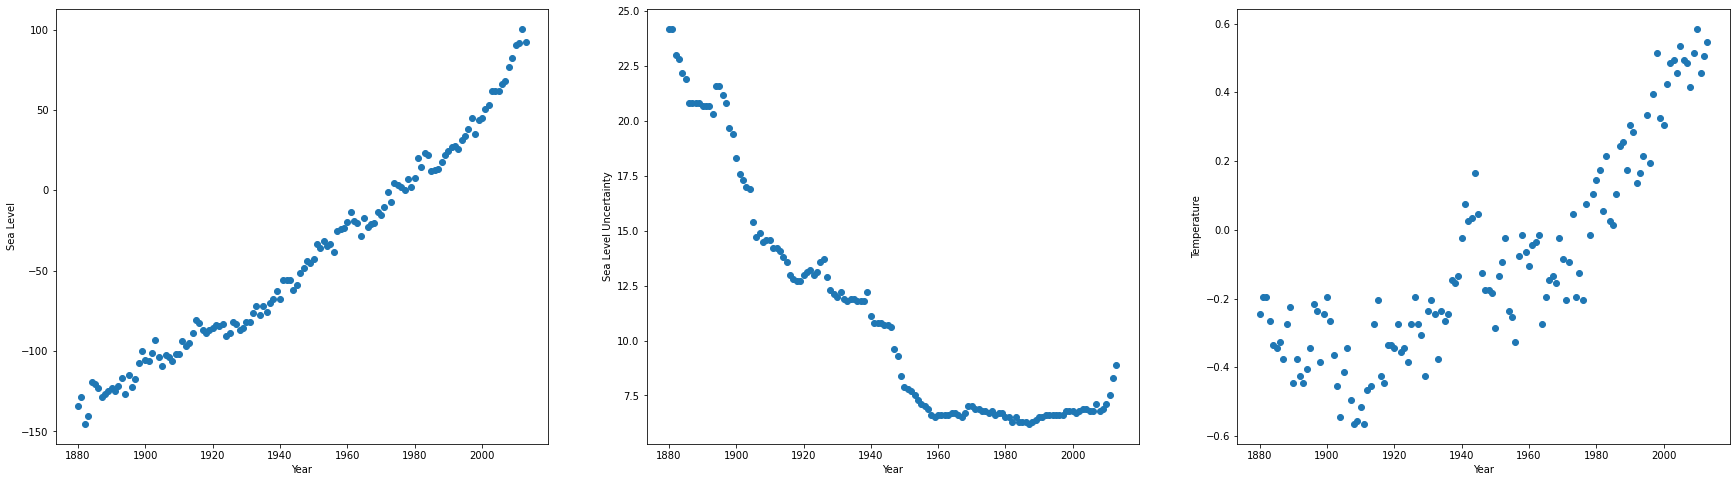

In [23]:
fig, ax = plt.subplots(1,3, figsize=(30,8))
ax[0].scatter(year, sealevel)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Sea Level")
ax[1].scatter(year, sealevel_sigma)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Sea Level Uncertainty")
ax[2].scatter(year, temperature)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Temperature")

**Part A (ii):** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

The uncertainty in global mean sea levels tends to decrease as a function of time and level out around 1960. It is highest in the earliest years around 1880 and lowest for the most recent 5 decades.. This is possibly a consequence of increasing precision measurements for average sea levels as years progressed and technology improved. 

---

**Part B:**  The "out-of-box" sea-level model

In your plot from **(a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seeems like someone should try to model the relationship between those two, huh?

In the helper function, slr, below, a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Model Calibration is the point of this problem. Let's have a look at why we need to do this in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

**Your task for Part B:**

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input. Normalizing data can mean several things. Follow the steps outlined below to "normalize" the data in the way needed for this problem:
- Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
- Subtract this value from each entry in the "sealevel" list (list returned by the slr function)


Make sure that you normalize the data prior to plotting.

In [24]:
# helpers

def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

In [25]:
sl = slr(3.4, -0.5, temperature)

In [26]:
year6090 = [i for i in range(len(year)) if year[i] > 1960 and year[i] <= 1990]
temp6090 = np.mean([sl[i] for i in year6090])
temp6090

-49.4698233333334

In [27]:
sl = [t-temp6090 for t in sl]

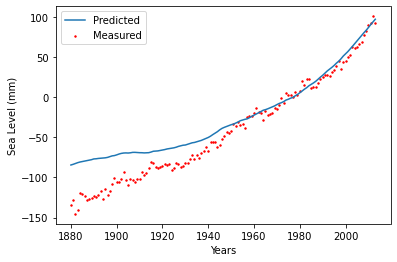

In [28]:
plt.scatter(year, sealevel, label="Measured",color="r",s=2)
plt.plot(year, sl, label="Predicted")
plt.xlabel("Years")
plt.ylabel("Sea Level (mm)")
plt.legend()

Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

**Part C:**   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  The following is a detailed description of the derivation of the objective funciton for a hill climbing routine. **Note, you do not need to do anything for this part other than to read about the objective function and execute the cell below, then move to part D.**

For a single data point in year $i$, $y_i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point.  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points. But that is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

If we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.

**Defining our objective function**

Now define a `log_likelihood(parameters, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep 
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here, so we can avoid the tedious task of sending the data set into this function.
* all three of these inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

In [29]:
# Here is the objective function. You will be using this function below when you code up hill-climbing and 
# simulated annealing routines.

def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    model = slr(alpha=parameters[0], Teq=parameters[1], temperature=temperature)
    
    # normalize
    reference = (year.index(1961), year.index(1990))
    model -= np.mean(model[reference[0]:(reference[1]+1)])

    return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])

**Part D:**  Defining our class structure

Now we will apply a hill-climbing algorithm to tune the $\alpha$ and $T_{eq}$ parameters.

Using our in-class lecture notebook on hill-climbing as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

In [30]:
class state:
    def __init__(self, alpha, Teq, value):
        self.alpha = alpha
        self.Teq = Teq
        self.value = value   

In [31]:
class problem:
    def __init__(self, initial, objective_function, stepsize_alpha, stepsize_Teq):
        self.initial_state = initial
        self.current_state = initial
        self.objective_function = objective_function
        self.stepsize_alpha = stepsize_alpha
        self.stepsize_Teq = stepsize_Teq
        
    def moves(self):
        '''return all possible moves to make from the current_state'''
        all_moves_alpha = []
        all_moves_Teq = []
        # could move right...
        all_moves_alpha.append(self.current_state.alpha + self.stepsize_alpha)
        all_moves_alpha.append(self.current_state.alpha)
        # ... or left!
        all_moves_alpha.append(self.current_state.alpha - self.stepsize_alpha)
        
        
        all_moves_Teq.append(self.current_state.Teq + self.stepsize_Teq)
        all_moves_Teq.append(self.current_state.Teq)
        all_moves_Teq.append(self.current_state.Teq - self.stepsize_Teq)
        return all_moves_alpha, all_moves_Teq

In [32]:
def hill_climb(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        nextAlpha, nextTeq, nextValue = problem.best_move()
        if nextValue <= problem.current_state.value:
            return problem.current_state
        #print(problem.current_state, nextMove)
        problem.current_state.alpha, problem.current_state.Teq, problem.current_state.value = nextAlpha, nextTeq, nextValue
    print('reached n_iter')
    return False

class problem_hillclimb(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves_alpha, all_moves_Teq = self.moves()
        # what is objective function for each of them?
        nodes = [[move_alpha, move_Teq] for move_alpha in all_moves_alpha for move_Teq in all_moves_Teq]
        #print(nodes)
        obj_func = [self.objective_function(i) for i in nodes]
        best_move = nodes[np.argmax(obj_func)]
        #print(best_move)
        best_alpha = best_move[0]
        best_Teq = best_move[1]
        return best_alpha, best_Teq, np.max(obj_func)

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going straight through the data points.
* If this isn't the case, remember to normalize your model against the 1961-1990 reference period!

In [58]:
initial_state = state(alpha=3.4, Teq=-0.5, value=log_likelihood([3.4,-0.5]))

In [59]:
sl_problem = problem_hillclimb(initial=initial_state, objective_function=log_likelihood, stepsize_alpha=0.001, stepsize_Teq=0.001)

In [60]:
out = hill_climb(sl_problem, n_iter=10000)
print("Alpha: " + str(out.alpha))
print("Teq: " + str(out.Teq))
print("Output Log-Likelihood: " + str(out.value))

Alpha: 1.8960000000001656
Teq: -0.9800000000000004
Output Log-Likelihood: -465.46633037920617


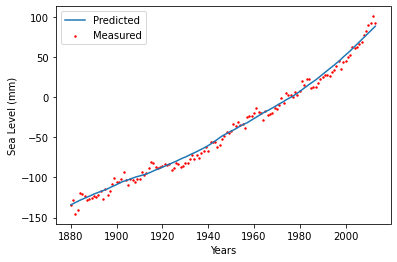

In [54]:
sl = slr(1.896, -0.98, temperature)
year6090 = [i for i in range(len(year)) if year[i] > 1960 and year[i] <= 1990]
temp6090 = np.mean([sl[i] for i in year6090])
temp6090
sl = [t-temp6090 for t in sl]

plt.scatter(year, sealevel, label="Measured",color="r",s=2)
plt.plot(year, sl, label="Predicted")
plt.xlabel("Years")
plt.ylabel("Sea Level (mm)")
plt.legend()

**Part E:**  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like.

In [37]:
class problem_anneal(problem):
#    def __init__(self, initial, objective_function, stepsize):

    def __init__(self, initial, objective_function, schedule_function, stepsize_alpha, stepsize_Teq):
        problem.__init__(self, initial, objective_function, stepsize_alpha, stepsize_Teq)
        self.schedule_function = schedule_function

    def random_move(self):
        '''return a random move, possible from the current_state'''
        all_moves_alpha, all_moves_Teq = self.moves()
        next_move = (np.random.choice(all_moves_alpha), np.random.choice(all_moves_Teq))
        return next_move, self.objective_function(next_move)

def schedule(time):
    '''some sort of mapping from time to temperature, to represent how we should be 
    "cooling off" - that is, accepting wacky solutions with lower and lower probability'''
    C = 20#
    p = 0.7#
    temp = C/(time+1)**p
    #print(temperature)
    
    return temp    

def simulated_annealing(problem, n_iter):
    
    current = problem.initial_state
    
    for t in range(n_iter):
        temp = problem.schedule_function(t)
        nextMove,nextValue = problem.random_move()
        delta_obj = current.value - nextValue
        #print(delta_obj)
        if delta_obj < 0:
            problem.current_state.alpha, problem.current_state.Teq, problem.current_state.value = nextMove[0], nextMove[1],nextValue
            
        else:
            p_accept = np.exp(-delta_obj/temp)
            
            accept = np.random.choice([True,False],p=[p_accept,1-p_accept])
            
            if accept:
                problem.current_state.alpha, problem.current_state.Teq, problem.current_state.value = nextMove[0], nextMove[1], nextValue
                
                
    return problem.current_state

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

In [61]:
initial_state_anneal = state(alpha=3.4, Teq=-0.5, value=log_likelihood([3.4,-0.5]))
sl_problem_anneal = problem_anneal(initial=initial_state_anneal, objective_function=log_likelihood, schedule_function=schedule, stepsize_alpha=0.01, stepsize_Teq=0.01)
out_anneal = simulated_annealing(sl_problem_anneal, n_iter=5000)
print("Alpha: " + str(out_anneal.alpha))
print("Teq: " + str(out_anneal.Teq))
print("Output Log-Likelihood: " + str(out_anneal.value))

Alpha: 1.8900000000000297
Teq: -0.9800000000000004
Output Log-Likelihood: -465.48885146292366


In [42]:
initial_state_anneal =  []
alphas = []
teqs = []
log_likelihoods =[]
for i in range(100):
    initial_state_anneal.append(state(alpha=5*i/100+1, Teq=-i/50, value=log_likelihood([7*i/100,-i/100])))
    sl_problem_anneal = problem_anneal(initial=initial_state_anneal[i], objective_function=log_likelihood, schedule_function=schedule, stepsize_alpha=0.01, stepsize_Teq=0.01)
    out_anneal = simulated_annealing(sl_problem_anneal, n_iter=5000)
    alphas.append(out_anneal.alpha)
    teqs.append(out_anneal.Teq)
    log_likelihoods.append(out_anneal.value)
    print("Alpha: " + str(out_anneal.alpha))
    print("Teq: " + str(out_anneal.Teq))
    print("Output Log-Likelihood: " + str(out_anneal.value))


Alpha: 1.0
Teq: 0.0
Output Log-Likelihood: -2781.6279304805903
Alpha: 1.05
Teq: -0.02
Output Log-Likelihood: -2791.126126510312
Alpha: 1.9200000000000008
Teq: -0.9700000000000006
Output Log-Likelihood: -465.4891513322434
Alpha: 1.9100000000000006
Teq: -0.9700000000000006
Output Log-Likelihood: -465.5111316835064
Alpha: 1.9200000000000004
Teq: -0.9700000000000006
Output Log-Likelihood: -465.4891513322434
Alpha: 1.8700000000000003
Teq: -0.9900000000000007
Output Log-Likelihood: -465.4873930313571
Alpha: 1.9400000000000006
Teq: -0.9600000000000006
Output Log-Likelihood: -465.5193407208356
Alpha: 1.9000000000000004
Teq: -0.9800000000000006
Output Log-Likelihood: -465.47709094150025
Alpha: 1.8600000000000003
Teq: -1.0000000000000007
Output Log-Likelihood: -465.4978572319427
Alpha: 1.9300000000000004
Teq: -0.9600000000000006
Output Log-Likelihood: -465.5566086735091
Alpha: 1.9200000000000004
Teq: -0.9700000000000006
Output Log-Likelihood: -465.4891513322434
Alpha: 1.9600000000000004
Teq: -0.

C:\Users\kylem\AppData\Local\Temp/ipykernel_15524/4035046443.py:11: RuntimeWarning: divide by zero encountered in log
  return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])


Alpha: 5.3
Teq: -1.72
Output Log-Likelihood: -7660.424103572215
Alpha: 5.35
Teq: -1.74
Output Log-Likelihood: -8215.868499652377
Alpha: 5.4
Teq: -1.76
Output Log-Likelihood: -8799.264830936376
Alpha: 5.45
Teq: -1.78
Output Log-Likelihood: -9411.380682410141
Alpha: 5.5
Teq: -1.8
Output Log-Likelihood: -10052.992875911761
Alpha: 5.55
Teq: -1.82
Output Log-Likelihood: -10724.887470131443
Alpha: 5.6
Teq: -1.84
Output Log-Likelihood: -11427.859760611489
Alpha: 5.65
Teq: -1.86
Output Log-Likelihood: -12162.714279746358
Alpha: 5.7
Teq: -1.88
Output Log-Likelihood: -12930.264796782649
Alpha: 5.75
Teq: -1.9
Output Log-Likelihood: -13731.334317819019
Alpha: 5.8
Teq: -1.92
Output Log-Likelihood: -14566.755085806348
Alpha: 5.85
Teq: -1.94
Output Log-Likelihood: -15437.36858054758
Alpha: 5.9
Teq: -1.96
Output Log-Likelihood: -16344.025518697763
Alpha: 5.95
Teq: -1.98
Output Log-Likelihood: -17287.585853764172


1.8960975609756165


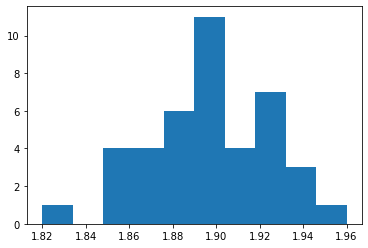

In [55]:
plt.hist([alphas[i] for i in range(len(log_likelihoods)) if log_likelihoods[i] > -500])
print(np.mean([alphas[i] for i in range(len(log_likelihoods)) if log_likelihoods[i] > -500]))

-0.9804878048780492


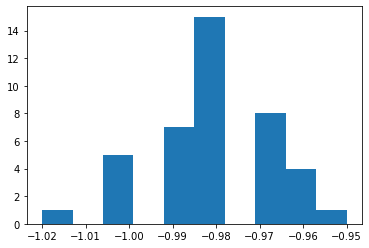

In [56]:
#print([teqs[i] for i in range(len(log_likelihoods)) if log_likelihoods[i] > -500])
#print([log_likelihood for log_likelihood in log_likelihoods if log_likelihood > -500])
plt.hist([teqs[i] for i in range(len(log_likelihoods)) if log_likelihoods[i] > -500])
print(np.mean([teqs[i] for i in range(len(log_likelihoods)) if log_likelihoods[i] > -500]))

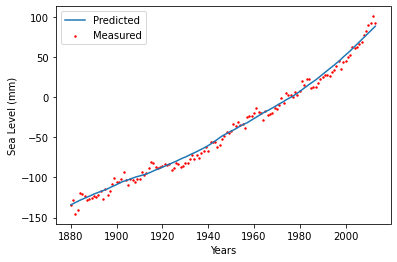

In [57]:
sl = slr(1.896, -0.98, temperature)
year6090 = [i for i in range(len(year)) if year[i] > 1960 and year[i] <= 1990]
temp6090 = np.mean([sl[i] for i in year6090])
temp6090
sl = [t-temp6090 for t in sl]

plt.scatter(year, sealevel, label="Measured",color="r",s=2)
plt.plot(year, sl, label="Predicted")
plt.xlabel("Years")
plt.ylabel("Sea Level (mm)")
plt.legend()

This output state is effectively the same as the output given by the traditional hill-climbing algorithm.

**Part F:**

Briefly summarize your findings. Specifically discuss the $\alpha$ and $T_{eq}$ parameter values you found in **Part D** and **Part E**. How do these compare to the parameters of the model given by Rahmstorf? Did your hill-climbing and/or your simulated annealing programs find a better fit than the Rahmstorf model? 

In both the hill-climbing and simulated annealing algorithms, we tended to find a global minimum of $\alpha=1.896$ and $T_{eq}=-0.98$. These parameters are substantially different from the default values of $\alpha=3.4$ and $T_{eq}=-0.5$. And, from the plots for both annealing and hill-climbing, these global minima provide a substantially better fit to the observed sealevel data. It is worth noting that for certain starting points our simulated annealing provided better or worse values. This is not surprising as with small step size and few iterations we simply cannot reach the global optimum.